Comparing two models created from `Logistic Regression` and other from `Support Vector Machines(SVM)`

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn import svm

from sklearn.utils import shuffle

In [45]:
pdata = pd.read_csv('C://Users/syeda/Downloads/pima-indians-diabetes-2.csv')

In [46]:
pdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
pdata.isnull().values.any()

False

In [48]:
X = pdata.drop(axis=1,columns='class')
Y = pdata[['class']]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.50,random_state=1)

In [50]:
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
logReg_Pred = logReg.predict_proba(X_test) # prob. of belonging to a class

#C - support vector classification
svm_classifier = svm.SVC(kernel='linear',probability=True)
svm_classifier.fit(X_train,Y_train)
svm_pred = svm_classifier.predict_proba(X_test)

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\syeda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\syeda\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [51]:
# compute ROC and AUC for logistic regression
fpr1, tpr1, threshold1 = roc_curve(Y_test,logReg_Pred[:,1])
auc1 = auc(fpr1,tpr1)
auc1

0.830181453988453

In [52]:
# compute ROC and AUC for SVM
fpr2, tpr2, threshold2 = roc_curve(Y_test,svm_pred[:,1])
auc2 = auc(fpr2,tpr2)
auc2

0.8360433604336043

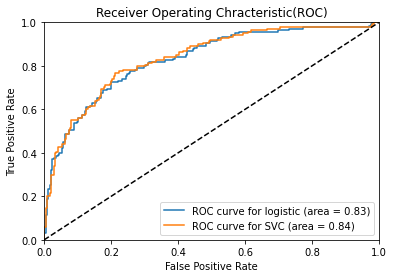

In [53]:
# plot the ROC

plt.plot(fpr1,tpr1,label='ROC curve for logistic (area = %0.2f)' % auc1) # logistic
plt.plot(fpr2,tpr2,label='ROC curve for SVC (area = %0.2f)' % auc2) # SVC
plt.plot([0,1],[0,1],'k--') # random model
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Chracteristic(ROC)')
plt.legend(loc='lower right')
plt.show()

In [54]:
roc1 = pd.DataFrame({'fpr1':pd.Series(fpr1),'tpr1':pd.Series(tpr1),'1-fpr1':pd.Series(1-fpr1),'tf1':pd.Series(tpr1-(1-fpr1)),'threshold1':pd.Series(threshold1)})
roc1

,fpr1,tpr1,1-fpr1,tf1,threshold1
0,0.000000,0.000000,1.000000,-1.000000,1.971585
1,0.000000,0.007246,1.000000,-0.992754,0.971585
2,0.000000,0.028986,1.000000,-0.971014,0.937880
3,0.004065,0.028986,0.995935,-0.966949,0.917983
4,0.004065,0.115942,0.995935,-0.879993,0.857262
...,...,...,...,...,...
123,0.975610,0.985507,0.024390,0.961117,0.021996
124,0.975610,0.992754,0.024390,0.968363,0.019959
125,0.979675,0.992754,0.020325,0.972428,0.019717
126,0.979675,1.000000,0.020325,0.979675,0.018808
